In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

from main import DecisionTree # our implementation

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv")
pima.columns = col_names
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label

In [4]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
clf = DecisionTreeClassifier(max_depth=3, criterion="gini")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy*100, 2))

Accuracy: 75.76


In [7]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

clf2 = DecisionTree("gini", max_depth=3)
clf2.fit(X_train,y_train)

y_pred2 = clf2.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print("Accuracy:", round(accuracy*100, 2))

Accuracy: 75.76


In [8]:
from collections import Counter

Counter(y_pred2)

Counter({0: 164, 1: 67})

In [9]:
column, threshold = clf2._root.get_rule()
print("Root node is split at:", X.columns[column], threshold)

Root node is split at: glucose 129.0


In [10]:
column, threshold = clf2._root._left_child.get_rule()
print("Left child is split at:", X.columns[column], threshold)

Left child is split at: bmi 26.2


In [11]:
column, threshold = clf2._root._right_child.get_rule()
print("Right child is split at:", X.columns[column], threshold)

Right child is split at: bmi 27.7


In [12]:
column, threshold = clf2._root._left_child._right_child.get_rule()
print("Right child of the Left child is split at:", X.columns[column], threshold)

Right child of the Left child is split at: age 27.0


In [13]:
column, threshold = clf2._root._right_child._right_child.get_rule()
print("Right child of the Right child is split at:", X.columns[column], threshold)

Right child of the Right child is split at: glucose 158.0


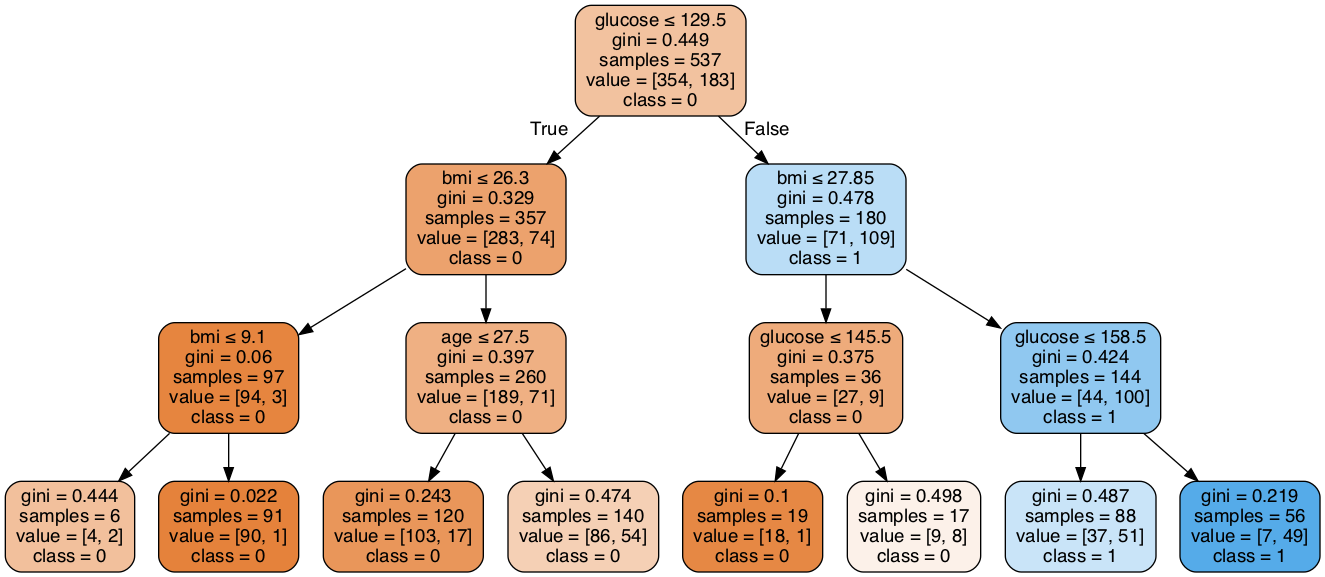

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

When we compare the splitting conditions generated by our model for the 2 generations of nodes with those produced by the scikit-learn implementation (graph is shown above), we can see that splitting conditions are almost identical. Also, the accuracies achived by the two models are identical.